Word2Vec model to generate Word embeddings for the words

In [5]:
# Genism
from gensim.models import Word2Vec
from smart_open import open
import os

# Tensor
import tensorflow as tf
from tensorflow import keras

#plotting
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#csv
import csv

# NLTK
import numpy as np 
import re
import string 
import nltk
from nltk.corpus import stopwords , brown

In [6]:
tf.reset_default_graph()

In [8]:
# scentences to tokens
# used for para to tokens
def preprocessing(corpus): 
    stop_words = set(stopwords.words('english'))     
    training_data = [] 
    sentences = corpus.split(".") 
    for i in range(len(sentences)): 
        sentences[i] = sentences[i].strip() 
        sentence = sentences[i].split() 
        x = [word.strip(string.punctuation) for word in sentence 
                                     if word not in stop_words] 
        x = [word.lower() for word in x] 
        training_data.append(x) 
    return training_data 

# function call
para = preprocessing(para)
para

[['25763772|t|dctn4',
  'modifier',
  'chronic',
  'pseudomonas',
  'aeruginosa',
  'infection',
  'cystic',
  'fibrosis25763772|a|pseudomonas',
  'aeruginosa',
  'pa',
  'infection',
  'cystic',
  'fibrosis',
  'cf',
  'patients',
  'associated',
  'worse',
  'long-term',
  'pulmonary',
  'disease',
  'shorter',
  'survival',
  'chronic',
  'pa',
  'infection',
  'cpa',
  'associated',
  'reduced',
  'lung',
  'function',
  'faster',
  'rate',
  'lung',
  'decline',
  'increased',
  'rates',
  'exacerbations',
  'shorter',
  'survival'],
 ['by',
  'using',
  'exome',
  'sequencing',
  'extreme',
  'phenotype',
  'design',
  'recently',
  'shown',
  'isoforms',
  'dynactin',
  '4',
  'dctn4',
  'may',
  'influence',
  'pa',
  'infection',
  'cf',
  'leading',
  'worse',
  'respiratory',
  'disease'],
 ['the',
  'purpose',
  'study',
  'investigate',
  'role',
  'dctn4',
  'missense',
  'variants',
  'pa',
  'infection',
  'incidence',
  'age',
  'first',
  'pa',
  'infection',
  'chron

In [9]:
DIM = 300

# Word to Vec model || genism
def model(itera):
    model = Word2Vec(para, min_count=1, size=DIM, sg = 1 , iter=itera)
    return model
w2v = model(100)

In [10]:
# existing vocabalary

vocab = list(w2v.wv.vocab)
print(vocab)
print(len(vocab))

['25763772|t|dctn4', 'modifier', 'chronic', 'pseudomonas', 'aeruginosa', 'infection', 'cystic', 'fibrosis25763772|a|pseudomonas', 'pa', 'fibrosis', 'cf', 'patients', 'associated', 'worse', 'long-term', 'pulmonary', 'disease', 'shorter', 'survival', 'cpa', 'reduced', 'lung', 'function', 'faster', 'rate', 'decline', 'increased', 'rates', 'exacerbations', 'by', 'using', 'exome', 'sequencing', 'extreme', 'phenotype', 'design', 'recently', 'shown', 'isoforms', 'dynactin', '4', 'dctn4', 'may', 'influence', 'leading', 'respiratory', 'the', 'purpose', 'study', 'investigate', 'role', 'missense', 'variants', 'incidence', 'age', 'first', 'cohort', 'adult', 'single', 'centre', 'polymerase', 'chain', 'reaction', 'direct', 'used', 'screen', 'dna', 'samples', 'a', 'total', '121', 'cochin', 'hospital', 'included', 'carrying', 'two', 'cftr', 'defects', '103', 'developed', 'least', '1', '68', 'identified', '24', '29/121', '17', '3/18', 'of', '29', '20/68', 'vs', '23', '8/35', 'without', 'interestingly',

In [11]:
# Saving model
w2v.save("w2v.model")

In [12]:
# testing
# similar by word
w2v.most_similar("dynactin")[:10]

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('shown', 0.9998401999473572),
 ('phenotype', 0.9998359680175781),
 ('isoforms', 0.9998251795768738),
 ('recently', 0.9998180270195007),
 ('4', 0.9998145699501038),
 ('extreme', 0.9998054504394531),
 ('design', 0.9998000860214233),
 ('influence', 0.9997928142547607),
 ('respiratory', 0.9997867941856384),
 ('sequencing', 0.9997827410697937)]

Generating training file for tags

In [13]:
#opening file (tag file)
with open('data.txt', 'r') as file:
    tag = file.read()
# file.seek(0,0)
str = tag.split("\n")
str

['63772\t0\t5\tDCTN4\tT116,T123\tC4308010',
 '25763772\t23\t63\tchronic Pseudomonas aeruginosa infection\tT047\tC0854135',
 '25763772\t67\t82\tcystic fibrosis\tT047\tC0010674',
 '25763772\t83\t120\tPseudomonas aeruginosa (Pa) infection\tT047\tC0854135',
 '25763772\t124\t139\tcystic fibrosis\tT047\tC0010674',
 '25763772\t141\t143\tCF\tT047\tC0010674',
 '25763772\t145\t153\tpatients\tT101\tC0030705',
 '25763772\t179\t188\tlong-term\tT079\tC0443252',
 '25763772\t189\t206\tpulmonary disease\tT047\tC0024115',
 '25763772\t211\t227\tshorter survival\tT169\tC0220921',
 '25763772\t233\t253\tchronic Pa infection\tT047\tC0854135',
 '25763772\t255\t258\tCPA\tT047\tC0854135',
 '25763772\t279\t300\treduced lung function\tT033\tC0847557',
 '25763772\t302\t329\tfaster rate of lung decline\tT033\tC3160731',
 '25763772\t341\t346\trates\tT081\tC1521828',
 '25763772\t350\t363\texacerbations\tT033\tC4086268',
 '25763772\t368\t384\tshorter survival\tT169\tC0220921',
 '25763772\t395\t411\texome sequencing\tT

In [14]:
#processing data -2
def preprocessing1(corpus):
    training_data = []
    for i in str:
        i = i.split()
        i.pop(0)
        i.pop(0)
        i.pop(0)
        i.pop(-1)
        i = [word.lower() for word in i]
        for el in range(len(i)-1):
            l2 = [i[el],i[len(i)-1]]
            training_data.append(tuple(l2)) 
    return training_data
tag = preprocessing1(str)

#dictionary format of dicts
tag_dict = {il[0]:il[1] for il in tag}
tag_dict

{'dctn4': 't116,t123',
 'chronic': 't047',
 'pseudomonas': 't047',
 'aeruginosa': 't047',
 'infection': 't047',
 'cystic': 't047',
 'fibrosis': 't047',
 '(pa)': 't047',
 'cf': 't047',
 'patients': 't101',
 'long-term': 't079',
 'pulmonary': 't047',
 'disease': 't047',
 'shorter': 't169',
 'survival': 't169',
 'pa': 't047',
 'cpa': 't047',
 'reduced': 't033',
 'lung': 't033',
 'function': 't033',
 'faster': 't033',
 'rate': 't033',
 'of': 't033',
 'decline': 't033',
 'rates': 't081',
 'exacerbations': 't033',
 'exome': 't063',
 'sequencing': 't063',
 'extreme': 't052',
 'phenotype': 't052',
 'design': 't052',
 'isoforms': 't116',
 'dynactin': 't116,t123',
 '4': 't116,t123',
 'respiratory': 't047',
 'study': 't062',
 'investigate': 't169',
 'missense': 't033',
 'variants': 't116',
 'incidence': 't081',
 'age': 't032',
 'cohort': 't098',
 'adult': 't100',
 'centre': 't073,t093',
 'polymerase': 't063',
 'chain': 't063',
 'reaction': 't063',
 'direct': 't063',
 'dna': 't026',
 'samples': 't

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


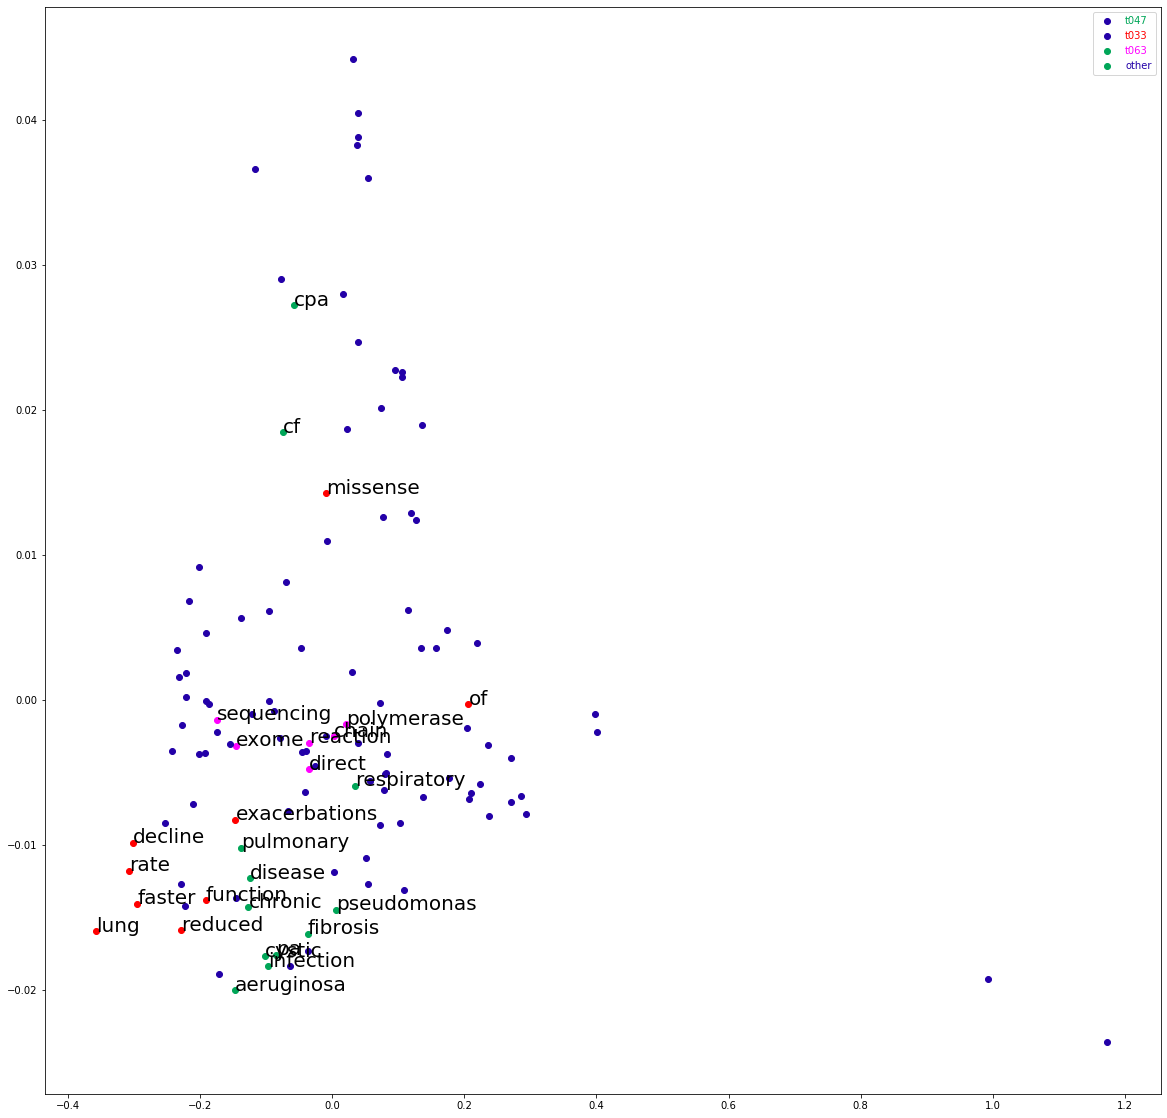

In [15]:
targets = ['t047','t033','t063','other']
colors = ['#00A658','#FF0000','#FF00FF','#2300A8']
colours = ['g','r','b']

# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
pca = PCA()
result = pca.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()

^^^^Make this change ^^^^
['dynactin 4', 't116,t123']   =====>>>>> [['dynactin 4', 't116'],['dynactin 4', 't123']]

POS (Part of Speech model)

/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


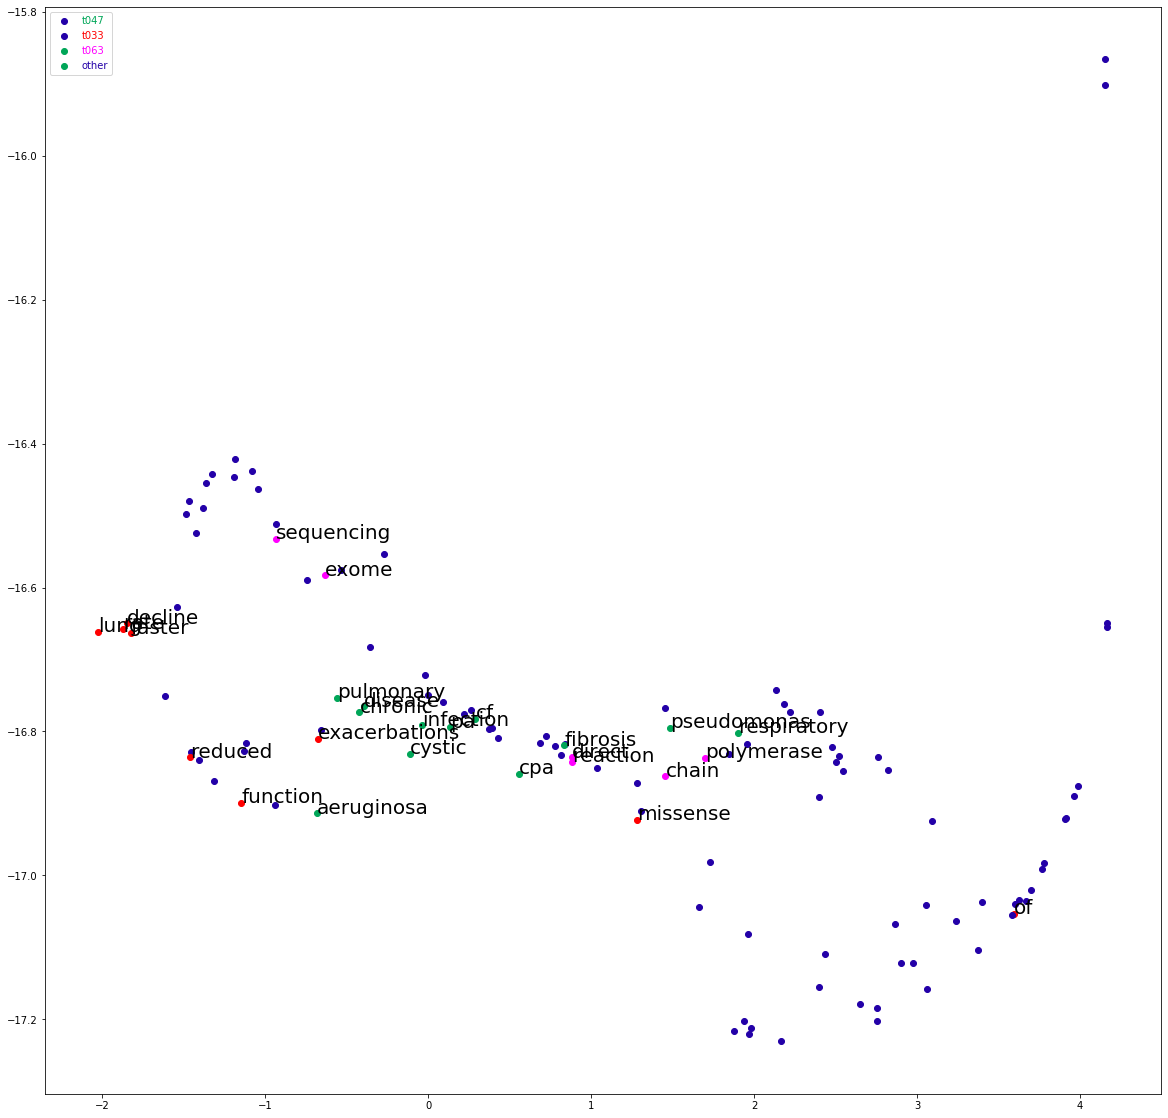

In [16]:
# To get the color to be displayed
def get_color(word):
    value = tag_dict.get(word, "o")
    for i in range(len(targets)):
        if value == targets[i]:
            break;
    return i

# PCA plotting for model
X = w2v[w2v.wv.vocab]
tsne = TSNE(perplexity=70.0,n_iter=5000)
result = tsne.fit_transform(X)

# create a scatter plot of the projection
f,ax = plt.subplots(figsize = (20,20))

words = list(w2v.wv.vocab)
for i, word in enumerate(words):
    j = get_color(word)
    ax.scatter(result[i, 0], result[i, 1],color=colors[j])
    if j<(len(targets)-1):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize = 20)

leg = ax.legend(targets)

for color,text in zip(colors,leg.get_texts()):
    text.set_color(color)
plt.show()

In [46]:
embeddings = w2v[w2v.wv.vocab]
print(embeddings.shape)

(118, 300)


/home/grrao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Bi-LSTM CRF model

In [18]:
def get_tag_vocab(tagged_words):
    tag2id={}
    for item in tagged_words:
        tag = item[1]
        tag2id.setdefault(tag, len(tag2id))
    return tag2id
word2id = {k: z.index for k, z in w2v.wv.vocab.items()}
tag2id = get_tag_vocab(tag)


In [19]:
word2id

{'25763772|t|dctn4': 34,
 'modifier': 35,
 'chronic': 8,
 'pseudomonas': 36,
 'aeruginosa': 13,
 'infection': 2,
 'cystic': 14,
 'fibrosis25763772|a|pseudomonas': 37,
 'pa': 3,
 'fibrosis': 38,
 'cf': 1,
 'patients': 0,
 'associated': 15,
 'worse': 16,
 'long-term': 39,
 'pulmonary': 17,
 'disease': 18,
 'shorter': 19,
 'survival': 20,
 'cpa': 4,
 'reduced': 40,
 'lung': 21,
 'function': 41,
 'faster': 42,
 'rate': 43,
 'decline': 44,
 'increased': 45,
 'rates': 46,
 'exacerbations': 47,
 'by': 48,
 'using': 49,
 'exome': 50,
 'sequencing': 22,
 'extreme': 51,
 'phenotype': 52,
 'design': 53,
 'recently': 54,
 'shown': 55,
 'isoforms': 56,
 'dynactin': 57,
 '4': 58,
 'dctn4': 5,
 'may': 23,
 'influence': 59,
 'leading': 60,
 'respiratory': 61,
 'the': 62,
 'purpose': 63,
 'study': 64,
 'investigate': 65,
 'role': 66,
 'missense': 7,
 'variants': 6,
 'incidence': 24,
 'age': 67,
 'first': 68,
 'cohort': 69,
 'adult': 25,
 'single': 70,
 'centre': 26,
 'polymerase': 71,
 'chain': 72,
 'r

In [20]:
tag2id

{'t116,t123': 0,
 't047': 1,
 't101': 2,
 't079': 3,
 't169': 4,
 't033': 5,
 't081': 6,
 't063': 7,
 't052': 8,
 't116': 9,
 't062': 10,
 't032': 11,
 't098': 12,
 't100': 13,
 't073,t093': 14,
 't026': 15,
 't028': 16,
 't007': 17,
 't045': 18,
 't046': 19}

In [21]:
for l1, l2 in w2v.wv.vocab.items():
    print(l1, l2)

#modifier Vocab(count:1, index:35, sample_int:2861157653)
#chronic Vocab(count:3, index:8, sample_int:1432848787)
#pseudomonas Vocab(count:1, index:36, sample_int:2861157653)

25763772|t|dctn4 Vocab(count:1, index:34, sample_int:2861157653)
modifier Vocab(count:1, index:35, sample_int:2861157653)
chronic Vocab(count:3, index:8, sample_int:1432848787)
pseudomonas Vocab(count:1, index:36, sample_int:2861157653)
aeruginosa Vocab(count:2, index:13, sample_int:1837234957)
infection Vocab(count:10, index:2, sample_int:710681036)
cystic Vocab(count:2, index:14, sample_int:1837234957)
fibrosis25763772|a|pseudomonas Vocab(count:1, index:37, sample_int:2861157653)
pa Vocab(count:9, index:3, sample_int:754241848)
fibrosis Vocab(count:1, index:38, sample_int:2861157653)
cf Vocab(count:11, index:1, sample_int:673624765)
patients Vocab(count:12, index:0, sample_int:641620380)
associated Vocab(count:2, index:15, sample_int:1837234957)
worse Vocab(count:2, index:16, sample_int:1837234957)
long-term Vocab(count:1, index:39, sample_int:2861157653)
pulmonary Vocab(count:2, index:17, sample_int:1837234957)
disease Vocab(count:2, index:18, sample_int:1837234957)
shorter Vocab(co

In [22]:
# Check it up in GK's code. same variable v in model.py in model_fn
#v = np.vstack([embeddings])



In [23]:
# Writing to a tsv file #####    1


keys = list(word2id.keys())
value = list(word2id.values())
with open('words.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['Word','vector'])
    for key , val in zip(keys, value):
        tsv_writer.writerow([key, val])
    out_file.close()

In [38]:
# Writing to a tsv file ######    2


keys = list(word2id.keys())
value = list(word2id.values())
with open('words.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['Word'])
    for key in keys:
        tsv_writer.writerow([key])
    out_file.close()

In [25]:
vocab_words = tf.contrib.lookup.index_table_from_file("words.tsv", num_oov_buckets=1)
vocab_words

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [54]:
words=[]
for w in keys:
    words.append(w.encode())
words = tf.Variable(words, dtype = tf.string , trainable = False)
word_ids = vocab_words.lookup(words)
word_ids

<tf.Tensor 'hash_table_Lookup_2/Select:0' shape=(118,) dtype=int64>

In [55]:
v = np.vstack([embeddings, [[0]*300]])
v = tf.Variable(v, dtype=tf.float32, trainable=False)

pretrained_embeddings = tf.nn.embedding_lookup(v, word_ids)
dropout = 0.5
pretrained_embeddings = tf.layers.dropout(pretrained_embeddings, rate = dropout, training= True)
pretrained_embeddings  
# refer https://github.com/guillaumegenthial/tf_ner/blob/e9bca45c7a3d73e1b7ee5ce12ff4f33e4598f9d9/models/chars_lstm_lstm_crf/main.py#L122  for more info

<tf.Tensor 'dropout_2/dropout/mul_1:0' shape=(118, 300) dtype=float32>

In [56]:
t = tf.transpose(pretrained_embeddings, perm=[1,0])
t

<tf.Tensor 'transpose_4:0' shape=(300, 118) dtype=float32>

In [57]:
lstm_cell_fw = tf.contrib.rnn.LSTMBlockFusedCell(100)
lstm_cell_bw = tf.contrib.rnn.LSTMBlockFusedCell(100)
lstm_cell_bw = tf.contrib.rnn.TimeReversedFusedRNN(lstm_cell_bw)

In [58]:
output_fw, _ = lstm_cell_fw(t, dtype=tf.float32, sequence_length=118)
output_bw, _ = lstm_cell_bw(t, dtype=tf.float32, sequence_length=118)

ValueError: Input 0 of layer lstm_fused_cell is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [300, 118]

In [30]:
output = tf.concat([output_fw, output_bw], axis=-1)
output = tf.transpose(output, perm=[1, 0])

NameError: name 'output_fw' is not defined